<a href="https://colab.research.google.com/github/KarinaSelingardi/ScrapyProcuraEmprego/blob/master/C%C3%B3pia_de_ProcuraEmprego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Ler arquivo CSV
df = pd.read_csv('empregacampinas02.csv')


In [ ]:
print(data.head())  # Exibe as primeiras linhas do DataFrame


  \n          AUX ESTOQUE / CAMPINAS / 5 VAGA(S)          
0                    (\n          2851601          )      
1  \n          AUX ADM – FATURAMENTO / CAMPINAS /...      
2                    (\n          2913210          )      
3  \n          FATURAMENTO / CAMPINAS / 1 VAGA(S)...      
4                    (\n          2912354          )      


In [ ]:
import pandas as pd

# Ler arquivo CSV
df = pd.read_csv('Catho02.csv')

In [ ]:
import pandas as pd


dados = ["São Paulo", "Porto Alegre", "Fortaleza", "Londrina", "Uberlândia", "Rio de Janeiro", "Campinas", "Sorocaba", "Florianópolis", "Maringá", "Curitiba", "Goiânia", "Auxiliar Administrativo", "Recepcionista", "Assistente Administrativo", "Auxiliar de Produção", "Advogado", "Vendedor", "Engenheiro Civil", "Programador", "Atendente", "Operador de Caixa", "Enfermeiro", "Analista Financeiro", "Administração", "Financeira", "Saúde", "Engenharia", "Comercial e Vendas", "Telemarketing", "Industrial", "Educação", "Jurídica", "Informática", "Suprimentos", "Artes, Arquitetura e Design", "Vagas de Home Office"]

# Criar um DataFrame
df = pd.DataFrame(dados, columns=['texto'])

# Aplicar codificação one-hot
df_encoded = pd.get_dummies(df)

# Exibir o DataFrame codificado
print(df_encoded)


    texto_Administração  texto_Advogado  texto_Analista Financeiro  \
0                 False           False                      False   
1                 False           False                      False   
2                 False           False                      False   
3                 False           False                      False   
4                 False           False                      False   
5                 False           False                      False   
6                 False           False                      False   
7                 False           False                      False   
8                 False           False                      False   
9                 False           False                      False   
10                False           False                      False   
11                False           False                      False   
12                False           False                      False   
13                Fa

In [ ]:



caminho_novo_arquivo = 'dados_codificados.csv'

# Salvo os dados codificados no novo arquivo CSV
df_encoded.to_csv(caminho_novo_arquivo, index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar dados CSV usando Pandas
data = pd.read_csv('/content/dados_codificados.csv')

# Pré-processamento dos dados
X = data.drop('texto_Administração', axis=1)
y = data['texto_Administração']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir modelo de rede neural com Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6654 - accuracy: 0.8621 - val_loss: 0.6464 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6508 - accuracy: 0.8966 - val_loss: 0.6338 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 0.6366 - accuracy: 0.9655 - val_loss: 0.6215 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 55ms/step - loss: 0.6227 - accuracy: 0.9655 - val_loss: 0.6093 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.6090 - accuracy: 0.9655 - val_loss: 0.5969 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5956 - accuracy: 0.9655 - val_loss: 0.5844 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 0.5822 - accuracy: 0.9655 - val_loss: 0.5719 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar dados CSV usando Pandas
data = pd.read_csv('/content/dados_codificados.csv')

# Pré-processamento dos dados
X = data.drop('texto_Administração', axis=1)  # Remover apenas a coluna alvo
y = data['texto_Administração']  # Coluna alvo

# Adicionar as colunas desejadas
X['texto_Vagas de Home Office'] = data['texto_Vagas de Home Office']
X['texto_Sorocaba'] = data['texto_Sorocaba']
X['texto_Administração'] = y  # Adicionar a coluna alvo de volta ao DataFrame X

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir modelo de rede neural com Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6994 - accuracy: 0.4138 - val_loss: 0.6833 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 59ms/step - loss: 0.6857 - accuracy: 0.5172 - val_loss: 0.6698 - val_accuracy: 0.8750
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 0.6723 - accuracy: 0.6897 - val_loss: 0.6563 - val_accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 59ms/step - loss: 0.6592 - accuracy: 0.8966 - val_loss: 0.6427 - val_accuracy: 0.8750
Epoch 5/10
1/1 [==============================] - 0s 59ms/step - loss: 0.6463 - accuracy: 0.9310 - val_loss: 0.6291 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 42ms/step - loss: 0.6336 - accuracy: 0.9655 - val_loss: 0.6156 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 59ms/step - loss: 0.6210 - accuracy: 0.9655 - val_loss: 0.6021 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

In [ ]:
# Gerar previsões
predictions = model.predict(X_test)

# Exibir algumas previsões e seus valores reais
for i in range(min(10, len(predictions))):
    print("Previsão:", predictions[i])
    print("Valor real:", y_test.iloc[i])



1/1 [==============================] - 0s 92ms/step
Previsão: [0.43319544]
Valor real: False
Previsão: [0.44904825]
Valor real: False
Previsão: [0.39781386]
Valor real: False
Previsão: [0.43203285]
Valor real: False
Previsão: [0.4194246]
Valor real: False
Previsão: [0.425116]
Valor real: False
Previsão: [0.44984433]
Valor real: False
Previsão: [0.42998132]
Valor real: False


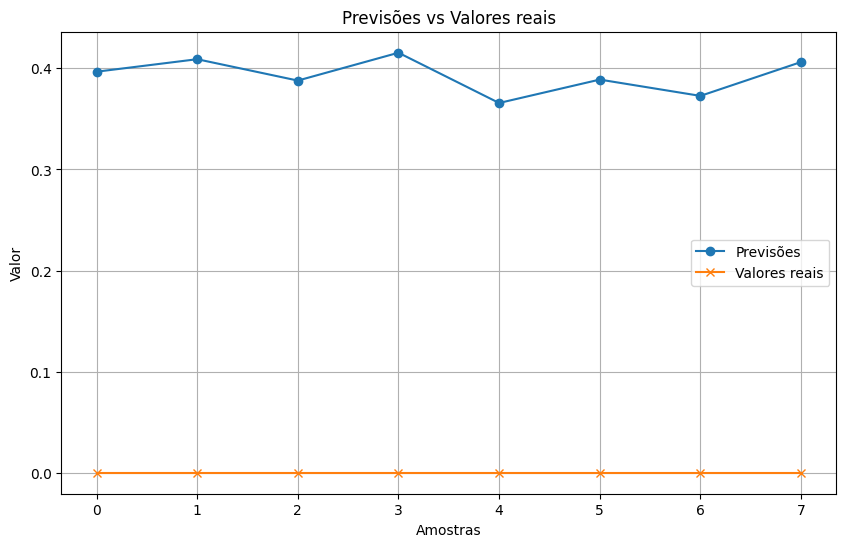

In [ ]:
import matplotlib.pyplot as plt

# Exibir algumas previsões e seus valores reais
num_samples = min(10, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(range(num_samples), predictions[:num_samples], label='Previsões', marker='o')
plt.plot(range(num_samples), y_test.iloc[:num_samples], label='Valores reais', marker='x')
plt.title('Previsões vs Valores reais')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 22ms/step


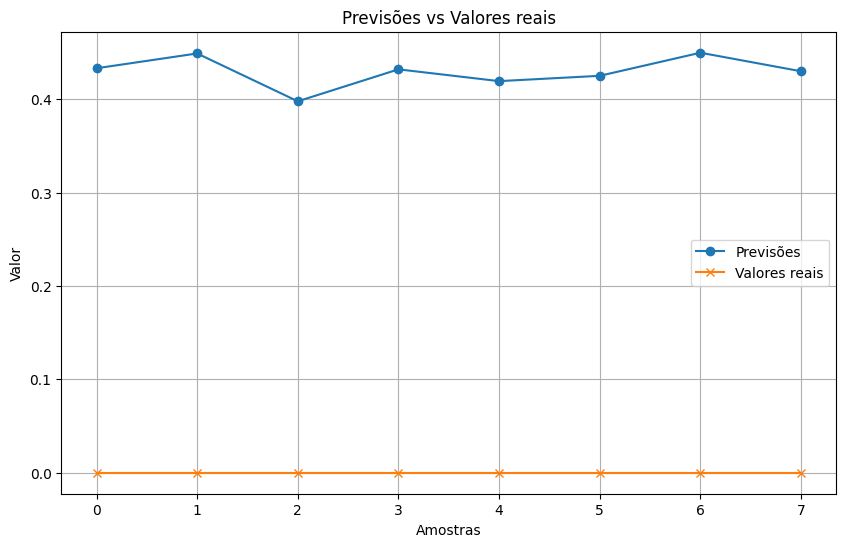

In [ ]:
import matplotlib.pyplot as plt

# Gerar previsões
predictions = model.predict(X_test)

# Exibir algumas previsões e seus valores reais
num_samples = min(10, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(range(num_samples), predictions[:num_samples], label='Previsões', marker='o')
plt.plot(range(num_samples), y_test.iloc[:num_samples], label='Valores reais', marker='x')
plt.title('Previsões vs Valores reais')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


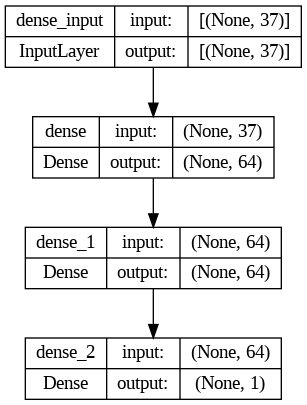

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualizar a arquitetura da rede neural
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
